# Setup

In [1]:
# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

#  necessary libraries and specify that graphs should be plotted inline.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns

np.random.seed(42) # Ensure reproducability

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [ ]:
################################################## Load Data ##################################################

df = pd.read_csv("/Users/baixiao/Desktop/bank-additional-full.csv")

print(list(df.columns.values))
#print(df.isnull().values.any())

In [2]:
print(df.shape)
df.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Understanding

In [3]:
#Drop "duration"
if 'duration' in df:
    df = df.drop(['duration'], axis=1)

#Check if there are any null values
check = df.isnull().values.any()
print('Are there null values? '+ str(check) )
print(df.shape)

# Retrieving Attributes (X)
X = df.iloc[:, 0:19]
features = []              #list of features to use in our tree from the dataset
for col in X.columns:     
    features.append(col)  
print("X:")
print(X.head())
    
# Retriving Target Variable (y)
y = df.iloc[:,19] # grab target column
print("y:")
print(y.head())

Are there null values? False
(41188, 20)
X:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   
3   may         mon         1    999         0  nonexistent           1.1   
4   may         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  eu

The frequency of instances per class is:  {'no': 36548, 'yes': 4640}  where YES means the customer deposited, and NO means the customer did not deposit.
The Percentages per class: No: 0.89; Yes: 0.11


Text(0.5, 1.0, 'Distribution of Target Variable')

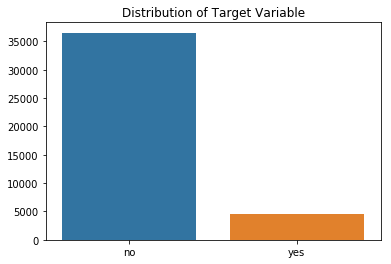

In [4]:
# Exploring Target Variable
unique, counts = np.unique(y, return_counts=True) # 2 distinct classes relatively balanced
print("The frequency of instances per class is: " , dict(zip(unique, counts)), " where YES means the customer deposited, and NO means the customer did not deposit.")
print("The Percentages per class:", "No: %.2f;" % (counts[0]/(counts[0]+counts[1])), "Yes: %.2f" % (counts[1]/(counts[0]+counts[1])))
sns.barplot(unique, counts)
plt.title("Distribution of Target Variable")

Conclusion: need data rebalance 

In [5]:
numeric =['age' , 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed' ]
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [6]:
#Info about the quantitative data
print("Description of Quantitative Values")
print(df.describe())

Description of Quantitative Values
               age      campaign         pdays      previous  emp.var.rate  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406      2.567593    962.475454      0.172963      0.081886   
std       10.42125      2.770014    186.910907      0.494901      1.570960   
min       17.00000      1.000000      0.000000      0.000000     -3.400000   
25%       32.00000      1.000000    999.000000      0.000000     -1.800000   
50%       38.00000      2.000000    999.000000      0.000000      1.100000   
75%       47.00000      3.000000    999.000000      0.000000      1.400000   
max       98.00000     56.000000    999.000000      7.000000      1.400000   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count    41188.000000   41188.000000  41188.000000  41188.000000  
mean        93.575664     -40.502600      3.621291   5167.035911  
std          0.578840       4.628198      1.734447     72.251

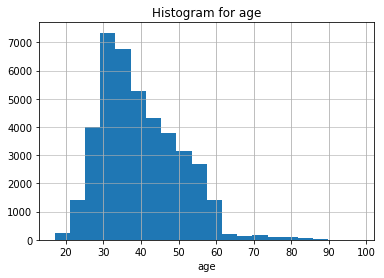

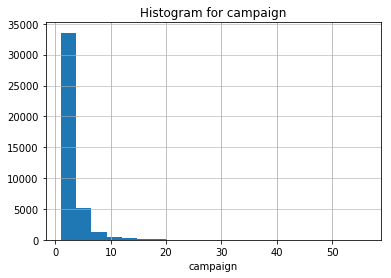

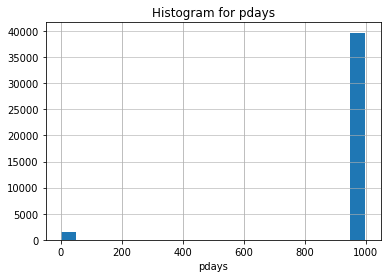

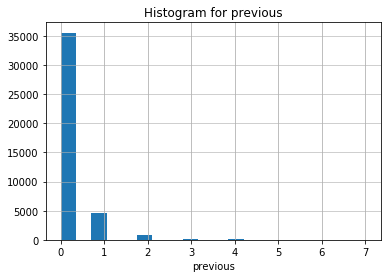

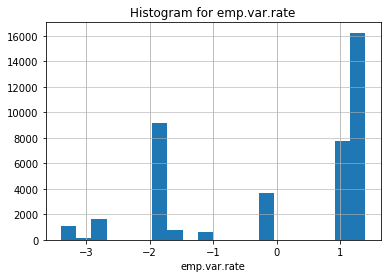

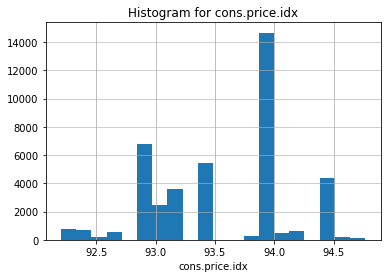

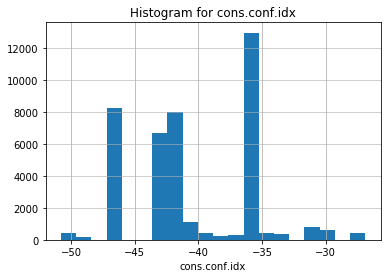

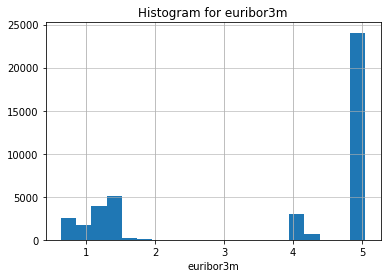

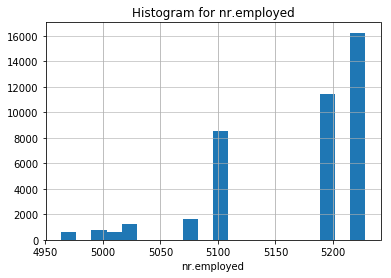

In [7]:
#plot hist for each columns
for i in numeric:
    dist = df[i]
    dist.hist(grid=True, bins=20)
    plt.title('Histogram for ' + str(i))
    plt.xlabel(i)
    plt.grid(axis='y', alpha=0.75) 
    plt.show()


Observation: The vast majority people have not been contacted in Previous campaigns.
Thinking: create new variable indicate indicating "Contacted in Previous or Not?"

In [8]:
#Info about the qualitative data
print("\n")
print("Description of Quantitative Values")
for i in categorical:
    print("\n")
    print("Description of " + "'" + i + "'" )
    cat = df[i]
    value_count = cat.value_counts()
    print(value_count)
    if 'unknown' in value_count.index:
        print("Percentage of 'unknown': %.3f" % (value_count['unknown']/sum(value_count)))



Description of Quantitative Values


Description of 'job'
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
Percentage of 'unknown': 0.008


Description of 'marital'
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
Percentage of 'unknown': 0.002


Description of 'education'
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
Percentage of 'unknown': 0.042


Description of 'default'
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
Percentage of 'unknown'

Observation & Conclusion: 
"default" column has more than 20% 'unknown's, and extreme data imbalance issue between "yes" and "no" in this column.
So, discard this column.

In [9]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1,0.00459,-0.0344,0.0244,-0.000371,0.000857,0.129,0.0108,-0.0177
campaign,0.00459,1,0.0526,-0.0791,0.151,0.128,-0.0137,0.135,0.144
pdays,-0.0344,0.0526,1,-0.588,0.271,0.0789,-0.0913,0.297,0.373
previous,0.0244,-0.0791,-0.588,1,-0.42,-0.203,-0.0509,-0.454,-0.501
emp.var.rate,-0.000371,0.151,0.271,-0.42,1,0.775,0.196,0.972,0.907
cons.price.idx,0.000857,0.128,0.0789,-0.203,0.775,1,0.059,0.688,0.522
cons.conf.idx,0.129,-0.0137,-0.0913,-0.0509,0.196,0.059,1,0.278,0.101
euribor3m,0.0108,0.135,0.297,-0.454,0.972,0.688,0.278,1,0.945
nr.employed,-0.0177,0.144,0.373,-0.501,0.907,0.522,0.101,0.945,1


Based on previous observation from statistics and graph, clean the data:<br>
-remove "default" feature<br>
-try deleting any observation with 'unknown' in columns (and see how much data is left)<br>
-data resampling(rebalancing)<br>

# Data Preparation

In [10]:
#replacing the YES and NO with 1 and 0 into binomial column
df.y[df.y == 'YES'] = 1
df.y[df.y == 'NO'] = 0 
classifications = ['1', '0']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
#remove "default" column:
if 'default' in X:
    X = X.drop(['default'], axis=1)

print("New X:")
print(X.shape)          #Now 18 indicators left
print(X.head())

New X:
(41188, 18)
   age        job  marital    education housing loan    contact month  \
0   56  housemaid  married     basic.4y      no   no  telephone   may   
1   57   services  married  high.school      no   no  telephone   may   
2   37   services  married  high.school     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no   no  telephone   may   
4   56   services  married  high.school      no  yes  telephone   may   

  day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0         mon         1    999         0  nonexistent           1.1   
1         mon         1    999         0  nonexistent           1.1   
2         mon         1    999         0  nonexistent           1.1   
3         mon         1    999         0  nonexistent           1.1   
4         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0          93.994          -36.4      4.857       5191.0

In [12]:
#try removing any row where there is 'unknown' in columns
indices = X[(X['job']=='unknown') | (X['marital']=='unknown') | (X['education']=='unknown') | (X['housing']=='unknown') | (X['loan']=='unknown')].index
print(indices)        #2943 observations would be removed (7.15% of original data)

Int64Index([    7,    10,    26,    29,    30,    31,    32,    35,    40,
               67,
            ...
            41109, 41110, 41113, 41114, 41115, 41118, 41120, 41122, 41135,
            41175],
           dtype='int64', length=2943)


In [13]:
#X = X.drop(indices, axis=0)     
X = X.drop(index=indices)        #drop observations(from "index")
#print(type(X))
print("New X:")
print(X.shape)         #Now: 38245 observations left (92.85% amount of original data left, which is ok)
print(X.head())
print()

y = y.drop(index=indices)
print("New y:")
print(y.shape)
print(y.head())

New X:
(38245, 18)
   age        job  marital    education housing loan    contact month  \
0   56  housemaid  married     basic.4y      no   no  telephone   may   
1   57   services  married  high.school      no   no  telephone   may   
2   37   services  married  high.school     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no   no  telephone   may   
4   56   services  married  high.school      no  yes  telephone   may   

  day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0         mon         1    999         0  nonexistent           1.1   
1         mon         1    999         0  nonexistent           1.1   
2         mon         1    999         0  nonexistent           1.1   
3         mon         1    999         0  nonexistent           1.1   
4         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0          93.994          -36.4      4.857       5191.0

The frequency of instances per class is:  {'no': 33987, 'yes': 4258}  where YES means the customer deposited, and NO means the customer did not deposit.
The Percentages per class: No: 0.89; Yes: 0.11


Text(0.5, 1.0, 'Distribution of Target Variable')

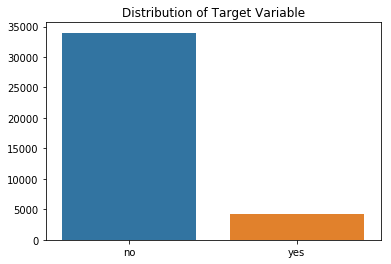

In [14]:
# Exploring Target Variable
unique, counts = np.unique(y, return_counts=True) # 2 distinct classes relatively balanced
print("The frequency of instances per class is: " , dict(zip(unique, counts)), " where YES means the customer deposited, and NO means the customer did not deposit.")
print("The Percentages per class:", "No: %.2f;" % (counts[0]/(counts[0]+counts[1])), "Yes: %.2f" % (counts[1]/(counts[0]+counts[1])))
sns.barplot(unique, counts)
plt.title("Distribution of Target Variable")

Observation: after the above steps, the percentages of each class("NO", "YES") have remained nearly the same -> Need resampling

#### First, ENCODING All Categorical Variables ("string" format into numeric categorical variables) -- using LabelEncoder (not dummies variables here yet)

In [15]:
from sklearn.preprocessing import LabelEncoder

print("Categories for 'job' now:", X['job'].unique())
print("Number of Categories for 'job' now:", len(X['job'].unique()))

lab_encoder = LabelEncoder()
job_encoded = lab_encoder.fit_transform(X['job'])
print("\nCorresponding Encodings Display:")
print(job_encoded[:50])
print(lab_encoder.inverse_transform(job_encoded[:50]))
X['job_encoded'] = job_encoded
#Observation: encoding: '0': 'admin.'; '1': 'blue=collar'; '2': 'entrepreneur'; '3': 'housemaid'; '4': 'management'; 
# '5': 'retired'; 6': 'self-employed'; '7': 'services'; '8': 'student'; '9': 'technician'; '10': 'unemployed' 

Categories for 'job' now: ['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
Number of Categories for 'job' now: 11

Corresponding Encodings Display:
[ 3  7  7  0  7  7  0  9  7  7  1  3  1  5  1  1  1  4 10  1  5  9  0  9
  6  9  4  1  7  9  0  9  2  0  0  0  9  0  1  0  1  0  3  0  0  1  9  4
  7 10]
['housemaid' 'services' 'services' 'admin.' 'services' 'services' 'admin.'
 'technician' 'services' 'services' 'blue-collar' 'housemaid'
 'blue-collar' 'retired' 'blue-collar' 'blue-collar' 'blue-collar'
 'management' 'unemployed' 'blue-collar' 'retired' 'technician' 'admin.'
 'technician' 'self-employed' 'technician' 'management' 'blue-collar'
 'services' 'technician' 'admin.' 'technician' 'entrepreneur' 'admin.'
 'admin.' 'admin.' 'technician' 'admin.' 'blue-collar' 'admin.'
 'blue-collar' 'admin.' 'housemaid' 'admin.' 'admin.' 'blue-collar'
 'technician' 'management' 'services' 'unemployed']


In [16]:
print("Categories for 'marital' now:", X['marital'].unique())
print("Number of Categories for 'marital' now:", len(X['marital'].unique()))

lab_encoder = LabelEncoder()
marital_encoded = lab_encoder.fit_transform(X['marital'])
print("\nCorresponding Encodings Display:")
print(marital_encoded[:20])
print(lab_encoder.inverse_transform(marital_encoded[:20]))
X['marital_encoded'] = marital_encoded
#Observation: encoding: '0': 'divorced'; '1': 'married'; '2': 'single'

Categories for 'marital' now: ['married' 'single' 'divorced']
Number of Categories for 'marital' now: 3

Corresponding Encodings Display:
[1 1 1 1 1 1 1 2 2 2 2 0 1 1 1 1 1 2 1 1]
['married' 'married' 'married' 'married' 'married' 'married' 'married'
 'single' 'single' 'single' 'single' 'divorced' 'married' 'married'
 'married' 'married' 'married' 'single' 'married' 'married']


In [17]:
print("Categories for 'education' now:", X['education'].unique())
print("Number of Categories for 'education' now:", len(X['education'].unique()))

lab_encoder = LabelEncoder()
education_encoded = lab_encoder.fit_transform(X['education'])
print("\nCorresponding Encodings Display:")
print(education_encoded[:30])
print(lab_encoder.inverse_transform(education_encoded[:30]))
X['education_encoded'] = education_encoded
#Observation: encoding: '0': 'basic.4y'; '1': 'basic.6y'; '2': 'basic.9y'; '3': 'high.school'; '4': 'illiterate'; 5': 'professional.course'; '6': 'university.degree'

Categories for 'education' now: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']
Number of Categories for 'education' now: 7

Corresponding Encodings Display:
[0 3 3 1 3 2 5 5 3 3 3 0 1 2 1 1 2 2 3 0 3 3 3 6 2 6 0 0 3 2]
['basic.4y' 'high.school' 'high.school' 'basic.6y' 'high.school'
 'basic.9y' 'professional.course' 'professional.course' 'high.school'
 'high.school' 'high.school' 'basic.4y' 'basic.6y' 'basic.9y' 'basic.6y'
 'basic.6y' 'basic.9y' 'basic.9y' 'high.school' 'basic.4y' 'high.school'
 'high.school' 'high.school' 'university.degree' 'basic.9y'
 'university.degree' 'basic.4y' 'basic.4y' 'high.school' 'basic.9y']


In [18]:
print("Categories for 'housing' now:", X['housing'].unique())
print("Number of Categories for 'education' now:", len(X['housing'].unique()))

lab_encoder = LabelEncoder()
housing_encoded = lab_encoder.fit_transform(X['housing'])
print("\nCorresponding Encodings Display:")
print(housing_encoded[:30])
print(lab_encoder.inverse_transform(housing_encoded[:30]))
X['housing_encoded'] = housing_encoded
#Observation: Binary variable "housing_encoded": '0': 'no'; '1': 'yes'

Categories for 'housing' now: ['no' 'yes']
Number of Categories for 'education' now: 2

Corresponding Encodings Display:
[0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1]
['no' 'no' 'yes' 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'no'
 'yes' 'no' 'no' 'yes']


In [19]:
print("Categories for 'loan' now:", X['loan'].unique())
print("Number of Categories for 'loan' now:", len(X['loan'].unique()))

lab_encoder = LabelEncoder()
loan_encoded = lab_encoder.fit_transform(X['loan'])
print("\nCorresponding Encodings Display:")
print(loan_encoded[:30])
print(lab_encoder.inverse_transform(loan_encoded[:30]))
X['loan_encoded'] = loan_encoded
#Observation: Binary variable "loan_encoded": '0': 'no'; '1': 'yes'

Categories for 'loan' now: ['no' 'yes']
Number of Categories for 'loan' now: 2

Corresponding Encodings Display:
[0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
['no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes'
 'no' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no'
 'no' 'no']


In [20]:
print("Categories for 'contact' now:", X['contact'].unique())
print("Number of Categories for 'contact' now:", len(X['contact'].unique()))

lab_encoder = LabelEncoder()
contact_encoded = lab_encoder.fit_transform(X['contact'])
print("\nCorresponding Encodings Display:")
print(contact_encoded[:10])
print(lab_encoder.inverse_transform(contact_encoded[:10]))
X['contact_encoded'] = contact_encoded
#Observation: encoding: '0': 'cellular'; '1': 'telephone'

Categories for 'contact' now: ['telephone' 'cellular']
Number of Categories for 'contact' now: 2

Corresponding Encodings Display:
[1 1 1 1 1 1 1 1 1 1]
['telephone' 'telephone' 'telephone' 'telephone' 'telephone' 'telephone'
 'telephone' 'telephone' 'telephone' 'telephone']


In [21]:
print("Categories for 'month' now:", X['month'].unique())
print("Number of Categories for 'month' now:", len(X['month'].unique()))

lab_encoder = LabelEncoder()
month_encoded = lab_encoder.fit_transform(X['month'])
print("\nCorresponding Encodings Display:")
print(month_encoded[:10])
print(lab_encoder.inverse_transform(month_encoded[:10]))
X['month_encoded'] = month_encoded
#Observation: encoding: '0': 'apr'; '1': 'aug'; '2': 'dec'; '3': 'jul'; '4': 'jun'; '5': 'mar'; '6': 'may'; '7': 'nov'; '8': 'oct'; '9': 'sep'

Categories for 'month' now: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Number of Categories for 'month' now: 10

Corresponding Encodings Display:
[6 6 6 6 6 6 6 6 6 6]
['may' 'may' 'may' 'may' 'may' 'may' 'may' 'may' 'may' 'may']


In [22]:
print("Categories for 'day_of_week' now:", X['day_of_week'].unique())
print("Number of Categories for 'day_of_week' now:", len(X['day_of_week'].unique()))

lab_encoder = LabelEncoder()
dayofweek_encoded = lab_encoder.fit_transform(X['day_of_week'])
print("\nCorresponding Encodings Display:")
print(dayofweek_encoded[:10])
print(lab_encoder.inverse_transform(dayofweek_encoded[:10]))
X['dayofweek_encoded'] = dayofweek_encoded
#Observation: encoding: '0': 'fri'; '1': 'mon'; '2': 'thu'; '3': 'tue'; '4': 'wed'

Categories for 'day_of_week' now: ['mon' 'tue' 'wed' 'thu' 'fri']
Number of Categories for 'day_of_week' now: 5

Corresponding Encodings Display:
[1 1 1 1 1 1 1 1 1 1]
['mon' 'mon' 'mon' 'mon' 'mon' 'mon' 'mon' 'mon' 'mon' 'mon']


In [23]:
print("Categories for 'poutcome' now:", X['poutcome'].unique())
print("Number of Categories for 'poutcome' now:", len(X['poutcome'].unique()))

lab_encoder = LabelEncoder()
poutcome_encoded = lab_encoder.fit_transform(X['poutcome'])
print("\nCorresponding Encodings Display:")
print(poutcome_encoded[:10])
print(lab_encoder.inverse_transform(poutcome_encoded[:10]))
X['poutcome_encoded'] = poutcome_encoded
#Observation: encoding: '0': 'failure'; '1': 'nonexistent'; '2': 'success'

Categories for 'poutcome' now: ['nonexistent' 'failure' 'success']
Number of Categories for 'poutcome' now: 3

Corresponding Encodings Display:
[1 1 1 1 1 1 1 1 1 1]
['nonexistent' 'nonexistent' 'nonexistent' 'nonexistent' 'nonexistent'
 'nonexistent' 'nonexistent' 'nonexistent' 'nonexistent' 'nonexistent']


In [24]:
X.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,...,nr.employed,job_encoded,marital_encoded,education_encoded,housing_encoded,loan_encoded,contact_encoded,month_encoded,dayofweek_encoded,poutcome_encoded
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,...,5191.0,3,1,0,0,0,1,6,1,1
1,57,services,married,high.school,no,no,telephone,may,mon,1,...,5191.0,7,1,3,0,0,1,6,1,1
2,37,services,married,high.school,yes,no,telephone,may,mon,1,...,5191.0,7,1,3,1,0,1,6,1,1
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,...,5191.0,0,1,1,0,0,1,6,1,1
4,56,services,married,high.school,no,yes,telephone,may,mon,1,...,5191.0,7,1,3,0,1,1,6,1,1


In [25]:
#re-retrieve the X variables (using the encoded categorical variables instead of in their string format)
X_encoded = X[['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 
      'job_encoded', 'marital_encoded', 'education_encoded', 'housing_encoded', 'loan_encoded',
     'contact_encoded', 'month_encoded', "dayofweek_encoded", "poutcome_encoded"]]
print(X_encoded.shape)
X_encoded.head()

(38245, 18)


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_encoded,marital_encoded,education_encoded,housing_encoded,loan_encoded,contact_encoded,month_encoded,dayofweek_encoded,poutcome_encoded
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,1,0,0,0,1,6,1,1
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,0,1,6,1,1
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,1,0,1,6,1,1
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,0,1,6,1,1
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,1,1,6,1,1


In [29]:
X_encoded.shape

(38245, 18)

In [30]:
y.shape

(38245,)

In [31]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

##### Data Resampling (Oversampling)

In [32]:
from sklearn.utils import resample

In [33]:
X_oversampled, y_oversampled = resample(X_encoded[y=='yes'], y[y=='yes'],replace=True,n_samples=X_encoded[y=='no'].shape[0], random_state=42)

print(X_oversampled.shape)      #upsampled "yes" class: also 33987 observations
print(y_oversampled.shape)

(33987, 18)
(33987,)


In [34]:
#after resampling, stack the original "no" target labelled class with the newly generated upsampled "yes" target class
X_balance = np.vstack((X_encoded[y=='no'], X_oversampled))      #*****IMPORTANT DETAIL: "hstack" and "vstack" appropriately used based on DIFFERENT SHAPE of arrays
y_balance = np.hstack((y[y=='no'], y_oversampled))

print(X_balance.shape)
print(y_balance.shape)

(67974, 18)
(67974,)


In [35]:
print("Balanced X:")
print(X_balance[:10, :])

Balanced X:
[[ 5.6000e+01  1.0000e+00  9.9900e+02  0.0000e+00  1.1000e+00  9.3994e+01
  -3.6400e+01  4.8570e+00  5.1910e+03  3.0000e+00  1.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  1.0000e+00  6.0000e+00  1.0000e+00  1.0000e+00]
 [ 5.7000e+01  1.0000e+00  9.9900e+02  0.0000e+00  1.1000e+00  9.3994e+01
  -3.6400e+01  4.8570e+00  5.1910e+03  7.0000e+00  1.0000e+00  3.0000e+00
   0.0000e+00  0.0000e+00  1.0000e+00  6.0000e+00  1.0000e+00  1.0000e+00]
 [ 3.7000e+01  1.0000e+00  9.9900e+02  0.0000e+00  1.1000e+00  9.3994e+01
  -3.6400e+01  4.8570e+00  5.1910e+03  7.0000e+00  1.0000e+00  3.0000e+00
   1.0000e+00  0.0000e+00  1.0000e+00  6.0000e+00  1.0000e+00  1.0000e+00]
 [ 4.0000e+01  1.0000e+00  9.9900e+02  0.0000e+00  1.1000e+00  9.3994e+01
  -3.6400e+01  4.8570e+00  5.1910e+03  0.0000e+00  1.0000e+00  1.0000e+00
   0.0000e+00  0.0000e+00  1.0000e+00  6.0000e+00  1.0000e+00  1.0000e+00]
 [ 5.6000e+01  1.0000e+00  9.9900e+02  0.0000e+00  1.1000e+00  9.3994e+01
  -3.6400e+01  4.8570e

The frequency of instances per class is:  {'no': 33987, 'yes': 33987}  where YES means the customer deposited, and NO means the customer did not deposit.
The Percentages per class: No: 0.50; Yes: 0.50


Text(0.5, 1.0, 'Distribution of Target Variable')

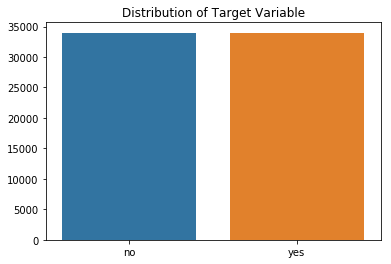

In [36]:
#check the distribution of the binary target variable again after resampling(oversampling of minority class)
unique, counts = np.unique(y_balance, return_counts=True) # 2 distinct classes relatively balanced
print("The frequency of instances per class is: " , dict(zip(unique, counts)), " where YES means the customer deposited, and NO means the customer did not deposit.")
print("The Percentages per class:", "No: %.2f;" % (counts[0]/(counts[0]+counts[1])), "Yes: %.2f" % (counts[1]/(counts[0]+counts[1])))
sns.barplot(unique, counts)
plt.title("Distribution of Target Variable")

In [37]:
X_balance = pd.DataFrame(X_balance)
y_balance = pd.DataFrame(y_balance)
print(X_balance.head())
print(y_balance.head())

     0    1      2    3    4       5     6      7       8    9    10   11  \
0  56.0  1.0  999.0  0.0  1.1  93.994 -36.4  4.857  5191.0  3.0  1.0  0.0   
1  57.0  1.0  999.0  0.0  1.1  93.994 -36.4  4.857  5191.0  7.0  1.0  3.0   
2  37.0  1.0  999.0  0.0  1.1  93.994 -36.4  4.857  5191.0  7.0  1.0  3.0   
3  40.0  1.0  999.0  0.0  1.1  93.994 -36.4  4.857  5191.0  0.0  1.0  1.0   
4  56.0  1.0  999.0  0.0  1.1  93.994 -36.4  4.857  5191.0  7.0  1.0  3.0   

    12   13   14   15   16   17  
0  0.0  0.0  1.0  6.0  1.0  1.0  
1  0.0  0.0  1.0  6.0  1.0  1.0  
2  1.0  0.0  1.0  6.0  1.0  1.0  
3  0.0  0.0  1.0  6.0  1.0  1.0  
4  0.0  1.0  1.0  6.0  1.0  1.0  
    0
0  no
1  no
2  no
3  no
4  no


In [40]:
#X_balance.to_csv("/Users/baixiao/Desktop/X_balance.csv")

In [41]:
#y_balance.to_csv("/Users/baixiao/Desktop/y_balance.csv")

create candidate new variables possible for later use in model building:<br>
- create dummy variables<br>

potential transformation to try (later):
- logging<br>
- square root<br>
- cube root<br>
...

In [42]:
# X_balance = pd.read_csv("/Users/baixiao/Desktop/X_balance.csv")
# y_balance = pd.read_csv("/Users/baixiao/Desktop/y_balance.csv")
# print(X_balance.shape)
# print(y_balance.shape)
# print(X_balance.head())
# print(y_balance.head())

(67974, 18)
(67974, 1)
   age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56         1    999         0           1.1          93.994   
1   57         1    999         0           1.1          93.994   
2   37         1    999         0           1.1          93.994   
3   40         1    999         0           1.1          93.994   
4   56         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  job_encoded  marital_encoded  \
0          -36.4      4.857       5191.0            3                1   
1          -36.4      4.857       5191.0            7                1   
2          -36.4      4.857       5191.0            7                1   
3          -36.4      4.857       5191.0            0                1   
4          -36.4      4.857       5191.0            7                1   

   education_encoded  housing_encoded  loan_encoded  contact_encoded  \
0                  0                0             0      

##### create dummy variables

In [43]:
job_dummies = pd.get_dummies(X_balance['job_encoded'])
#print("Job dummies original:")
#print(job_dummies.head())
print("Job dummies shape original:", job_dummies.shape)
print()

#***drop dummy of one category out to avoid MULTICOLLINEARITY
job_dummies = job_dummies.drop(job_dummies.columns[10], axis=1)
#print(job_dummies.head())
print("\nNow job dummies shape:", job_dummies.shape)
#job_dummies = job_dummies.rename(columns={"0": "is_admin", "1":"is_bluecollar", "2":"is_entrepreneur", "3":"is_housemaid", "4":"is_management", "5":"is_retired", "6":"is_selfemployed", "7":"is_services", "8":"is_student", "9":"is_technician"}, inplace=True)
job_dummies.columns = ["is_admin", "is_bluecollar", "is_entrepreneur", "is_housemaid", "is_management", "is_retired", "is_selfemployed", "is_services", "is_student", "is_technician"]
print(job_dummies.head())

Job dummies shape original: (67974, 11)


Now job dummies shape: (67974, 10)
   is_admin  is_bluecollar  is_entrepreneur  is_housemaid  is_management  \
0         0              0                0             1              0   
1         0              0                0             0              0   
2         0              0                0             0              0   
3         1              0                0             0              0   
4         0              0                0             0              0   

   is_retired  is_selfemployed  is_services  is_student  is_technician  
0           0                0            0           0              0  
1           0                0            1           0              0  
2           0                0            1           0              0  
3           0                0            0           0              0  
4           0                0            1           0              0  


In [44]:
marital_dummies = pd.get_dummies(X_balance['marital_encoded'])
print("Marital dummies shape original:", marital_dummies.shape)
print()

#***drop dummy of one category out to avoid MULTICOLLINEARITY
marital_dummies = marital_dummies.drop(marital_dummies.columns[2], axis=1)
print("\nNow marital dummies shape:", marital_dummies.shape)
marital_dummies.columns = ["is_divorced", "is_married"]
print(marital_dummies.head())

Marital dummies shape original: (67974, 3)


Now marital dummies shape: (67974, 2)
   is_divorced  is_married
0            0           1
1            0           1
2            0           1
3            0           1
4            0           1


In [45]:
education_dummies = pd.get_dummies(X_balance['education_encoded'])
print("Education dummies shape original:", education_dummies.shape)
print()

#***drop dummy of one category out to avoid MULTICOLLINEARITY
education_dummies = education_dummies.drop(education_dummies.columns[6], axis=1)
print("\nNow education dummies shape:", education_dummies.shape)
education_dummies.columns = ["is_basic.4y", "is_basic.6y", "is_baisc.9y", "is_high.school", "is_illiterate", "is_professional.course"]
print(education_dummies.head())

Education dummies shape original: (67974, 7)


Now education dummies shape: (67974, 6)
   is_basic.4y  is_basic.6y  is_baisc.9y  is_high.school  is_illiterate  \
0            1            0            0               0              0   
1            0            0            0               1              0   
2            0            0            0               1              0   
3            0            1            0               0              0   
4            0            0            0               1              0   

   is_professional.course  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  


In [46]:
#"housing" is binary already
housing_dummies = X_balance['housing_encoded']
housing_dummies = housing_dummies.rename("is_housing")
print(housing_dummies.head())

0    0
1    0
2    1
3    0
4    0
Name: is_housing, dtype: int64


In [47]:
#"loan" is binary already
loan_dummies = X_balance['loan_encoded']
loan_dummies = loan_dummies.rename("is_loan")
print(loan_dummies.head())

0    0
1    0
2    0
3    0
4    1
Name: is_loan, dtype: int64


In [48]:
#"contact" is binary already also
contact_dummies = X_balance['contact_encoded']
contact_dummies = contact_dummies.rename("is_telephone")
print(contact_dummies.head())

0    1
1    1
2    1
3    1
4    1
Name: is_telephone, dtype: int64


In [49]:
month_dummies = pd.get_dummies(X_balance['month_encoded'])
print("Month dummies shape original:", month_dummies.shape)
print()

#***drop dummy of one category out to avoid MULTICOLLINEARITY
month_dummies = month_dummies.drop(month_dummies.columns[9], axis=1)
print("\nNow month dummies shape:", month_dummies.shape)
month_dummies.columns = ["is_apr", "is_aug", "is_dec", "is_jul", "is_jun", "is_mar", "is_may", "is_nov", "is_oct"]
print(month_dummies.head())

Month dummies shape original: (67974, 10)


Now month dummies shape: (67974, 9)
   is_apr  is_aug  is_dec  is_jul  is_jun  is_mar  is_may  is_nov  is_oct
0       0       0       0       0       0       0       1       0       0
1       0       0       0       0       0       0       1       0       0
2       0       0       0       0       0       0       1       0       0
3       0       0       0       0       0       0       1       0       0
4       0       0       0       0       0       0       1       0       0


In [50]:
dayofweek_dummies = pd.get_dummies(X_balance['dayofweek_encoded'])
print("dayofweek dummies shape original:", dayofweek_dummies.shape)
print()

#***drop dummy of one category out to avoid MULTICOLLINEARITY
dayofweek_dummies = dayofweek_dummies.drop(dayofweek_dummies.columns[4], axis=1)
print("\nNow dayofweek dummies shape:", dayofweek_dummies.shape)
dayofweek_dummies.columns = ["is_fri", "is_mon", "is_thu", "is_tue"]
print(dayofweek_dummies.head())

dayofweek dummies shape original: (67974, 5)


Now dayofweek dummies shape: (67974, 4)
   is_fri  is_mon  is_thu  is_tue
0       0       1       0       0
1       0       1       0       0
2       0       1       0       0
3       0       1       0       0
4       0       1       0       0


In [51]:
poutcome_dummies = pd.get_dummies(X_balance['poutcome_encoded'])
print("poutcome dummies shape original:", poutcome_dummies.shape)
print()

#***drop dummy of one category out to avoid MULTICOLLINEARITY
poutcome_dummies = poutcome_dummies.drop(poutcome_dummies.columns[2], axis=1)
print("\nNow poutcome dummies shape:", poutcome_dummies.shape)
poutcome_dummies.columns = ["is_failure", "is_nonexistent"]
print(poutcome_dummies.head())

poutcome dummies shape original: (67974, 3)


Now poutcome dummies shape: (67974, 2)
   is_failure  is_nonexistent
0           0               1
1           0               1
2           0               1
3           0               1
4           0               1


In [52]:
#X_balance.dtypes

In [53]:
#concatenate all the columns of dummy variables with the original X_balance data
X_dummies = pd.concat([X_balance, job_dummies, marital_dummies, education_dummies, housing_dummies, loan_dummies, contact_dummies, month_dummies, dayofweek_dummies, poutcome_dummies], axis=1)
print(X_dummies.shape)
X_dummies.head()

(67974, 54)


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_encoded,...,is_mar,is_may,is_nov,is_oct,is_fri,is_mon,is_thu,is_tue,is_failure,is_nonexistent
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,...,0,1,0,0,0,1,0,0,0,1
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,...,0,1,0,0,0,1,0,0,0,1
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,...,0,1,0,0,0,1,0,0,0,1
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,1,0,0,0,1
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,...,0,1,0,0,0,1,0,0,0,1


In [54]:
X_dummies.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_encoded', 'marital_encoded', 'education_encoded',
       'housing_encoded', 'loan_encoded', 'contact_encoded', 'month_encoded',
       'dayofweek_encoded', 'poutcome_encoded', 'is_admin', 'is_bluecollar',
       'is_entrepreneur', 'is_housemaid', 'is_management', 'is_retired',
       'is_selfemployed', 'is_services', 'is_student', 'is_technician',
       'is_divorced', 'is_married', 'is_basic.4y', 'is_basic.6y',
       'is_baisc.9y', 'is_high.school', 'is_illiterate',
       'is_professional.course', 'is_housing', 'is_loan', 'is_telephone',
       'is_apr', 'is_aug', 'is_dec', 'is_jul', 'is_jun', 'is_mar', 'is_may',
       'is_nov', 'is_oct', 'is_fri', 'is_mon', 'is_thu', 'is_tue',
       'is_failure', 'is_nonexistent'],
      dtype='object')

In [55]:
#drop the original "housing_encoded", "loan_encoded" in X_dummies
X_dummies = X_dummies.drop(['housing_encoded', 'loan_encoded'], axis=1)
X_dummies.shape
#X_dummies.head()

(67974, 52)

In [56]:
#change "999" in 'pdays' into "-1" (avoid unnecessary skewness while remaining the same meaning)
X_dummies.loc[X_dummies['pdays']==999, 'pdays'] = -1
X_dummies.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_encoded,...,is_mar,is_may,is_nov,is_oct,is_fri,is_mon,is_thu,is_tue,is_failure,is_nonexistent
0,56,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,3,...,0,1,0,0,0,1,0,0,0,1
1,57,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,7,...,0,1,0,0,0,1,0,0,0,1
2,37,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,7,...,0,1,0,0,0,1,0,0,0,1
3,40,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,1,0,0,0,1
4,56,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,7,...,0,1,0,0,0,1,0,0,0,1


In [57]:
X_dummies.to_csv("/Users/baixiao/Desktop/X_dummies.csv")

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
X = pd.read_csv("/Users/baixiao/Desktop/X_dummies.csv")
X.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_encoded,...,is_mar,is_may,is_nov,is_oct,is_fri,is_mon,is_thu,is_tue,is_failure,is_nonexistent
0,56,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,3,...,0,1,0,0,0,1,0,0,0,1
1,57,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,7,...,0,1,0,0,0,1,0,0,0,1
2,37,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,7,...,0,1,0,0,0,1,0,0,0,1
3,40,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,1,0,0,0,1
4,56,1,-1,0,1.1,93.994,-36.4,4.857,5191.0,7,...,0,1,0,0,0,1,0,0,0,1
